# **Análisis de Datos Exploratorio**

Valeria Arciga Valencia A01737555, Abril Álvarez Mercado A00839255

## Dataset de Enfermedades y Síntomas

### 1. Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Carga de datos

Carga de datos en donde la columna de enfermedades se convierte en el índice

In [2]:
df = pd.read_csv("Diagnostico_basado_en_reglas.csv", index_col=0)
df.head()

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
diseases,,,,,,,,,,,,,,,,,,,,,
panic disorder,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
panic disorder,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
panic disorder,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
panic disorder,1,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
panic disorder,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


Observación en donde la base de datos tiene como columnas a los síntomas, en las filas se observan cada uno de los registros de diagnósticos a enfermedades, la base de datos es binaria, es decir, el 0 representa la ausencia del síntoma en el registro, y el 1 representa que está presente el síntoma en ese registro.

Para continuar, se realiza un agrupamiento de los datos, en donde se agrupan por enfermedad y se suman los síntomas de los múltiples registros por enfermedad, a modo de poder obtener los síntomas más frecuentes por enfermedad.

In [3]:
resultado = df.groupby(df.index, sort=False).sum()
resultado.head()

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
diseases,,,,,,,,,,,,,,,,,,,,,
panic disorder,451,451,445,620,0,478,470,469,462,451,...,0,0,0,0,0,0,0,0,0,0
vocal cord polyp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
turner syndrome,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cryptorchidism,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
poisoning due to ethylene glycol,0,24,0,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Al realizar la suma y agrupamiento se observa una diferencia en los resultados de la base de datos, en donde se observa que hay columnas con valores en 0, en donde en ningún registro de la enfermedad se ha tenido ese síntoma.

### 3. Análisis básico

#### Dimensiones del DataFrame

In [4]:
print(f"Dimensiones: {df.shape}")

Dimensiones: (246945, 377)


Hay 377 síntomas, de donde se han registrado 246945 pacientes

#### Tipos de datos

In [5]:
df.dtypes

anxiety and nervousness             int64
depression                          int64
shortness of breath                 int64
depressive or psychotic symptoms    int64
sharp chest pain                    int64
                                    ...  
hip weakness                        int64
back swelling                       int64
ankle stiffness or tightness        int64
ankle weakness                      int64
neck weakness                       int64
Length: 377, dtype: object

Se observa que la mayoría de datos son enteros, para verificar que este sea el caso en todo el dataframe se obtienen las columnas no numéricas

#### Verificación de datos numéricos en todas las columnas

In [6]:
tipos_no_numericos = df.dtypes[~df.dtypes.apply(pd.api.types.is_numeric_dtype)]

print("Columnas no numéricas:")
print(tipos_no_numericos)

Columnas no numéricas:
Series([], dtype: object)


Se obtiene como resultado que todos los datos son numéricos, o no hay columnas con datos no numéricos, en cuanto a los síntomas

#### Resumen Estadístico

Se realiza el resumen estadístico en base a la agrupación de las enfermedades

In [7]:
resultado.sum(axis=1).describe()

count     773.000000
mean     1703.649418
std      2076.741192
min         2.000000
25%        89.000000
50%       694.000000
75%      2558.000000
max      7364.000000
dtype: float64

El mínimo de síntomas en la suma de casos de enfermedades es de 2, mientras que el máximo es de 7364 casos que repiten el mismo síntoma en una enfermedad

#### Identificación de valores nulos

In [8]:
total_nulos = df.isnull().sum().sum()
print("\nSuma total de valores nulos en el DataFrame:", total_nulos)


Suma total de valores nulos en el DataFrame: 0


### Datos específicos de la situación problema

#### Enfermedades únicas

In [9]:
enfermedades = df.index.unique()
print(f"\nCantidad de enfermedades: {len(enfermedades)}")


Cantidad de enfermedades: 773


In [10]:
enfermedades

Index(['panic disorder', 'vocal cord polyp', 'turner syndrome',
       'cryptorchidism', 'poisoning due to ethylene glycol',
       'atrophic vaginitis', 'fracture of the hand',
       'cellulitis or abscess of mouth', 'eye alignment disorder',
       'headache after lumbar puncture',
       ...
       'asperger syndrome', 'mucositis', 'paronychia', 'open wound of the jaw',
       'white blood cell disease', 'kaposi sarcoma', 'spondylolisthesis',
       'pseudotumor cerebri', 'conjunctivitis due to virus',
       'open wound of the nose'],
      dtype='object', name='diseases', length=773)

En el dataframe existen 773 enfermedades distintas

#### Enfermedades con sólo un registro

In [11]:
enfermedades_unicas = df.index.value_counts()[df.index.value_counts() == 1].index

print(f"Enfermedades con solo un registro: {len(enfermedades_unicas)}\n{enfermedades_unicas}")

Enfermedades con solo un registro: 19
Index(['hypergammaglobulinemia', 'open wound of the head',
       'rocky mountain spotted fever', 'diabetes', 'open wound of the cheek',
       'foreign body in the nose', 'gas gangrene', 'high blood pressure',
       'myocarditis', 'heat stroke', 'chronic ulcer', 'open wound of the knee',
       'open wound of the chest', 'open wound due to trauma', 'thalassemia',
       'huntington disease', 'typhoid fever', 'kaposi sarcoma',
       'turner syndrome'],
      dtype='object', name='diseases')


Existen 19 enfermedades que tienen un sólo registro, por lo que resultan los únicos síntomas que se pueden considerar para el diagnóstico, lo que puede generar un sesgo de información

#### Enfermedades con más síntomas

In [12]:
sta_dis = df.agg(['sum', 'mean', 'std'], axis=1)
sta_dis.columns = ['Total', 'Media', 'Desviación Estándar']

print("Enfermedades con más síntomas:")
display(sta_dis.nlargest(5, 'Total'))

Enfermedades con más síntomas:


,Total,Media,Desviación Estándar
diseases,,,
acute pancreatitis,12.0,0.03183,0.175781
concussion,12.0,0.03183,0.175781
conjunctivitis due to allergy,12.0,0.03183,0.175781
spinal stenosis,12.0,0.03183,0.175781
liver disease,12.0,0.03183,0.175781


La mayor cantidad de síntomas registrado por enfermedad es de 12

#### Síntomas únicos

In [13]:
sintomas_unicos = df.columns[df.sum(axis=0) == 1]
print(f"\nSíntomas que aparecen en solo una enfermedad: {len(sintomas_unicos)}")


Síntomas que aparecen en solo una enfermedad: 3


In [14]:
sintomas_unicos

Index(['feeling hot', 'thirst', 'skin pain'], dtype='object')

Los síntomas que aparecen una única vez son feeling hot, thrist y skin pain, en donde se les puede considerar para el diagnóstico inmediato de las enfermedades

### 4. Visualizaciones

#### Distribución de síntomas en enfermedades

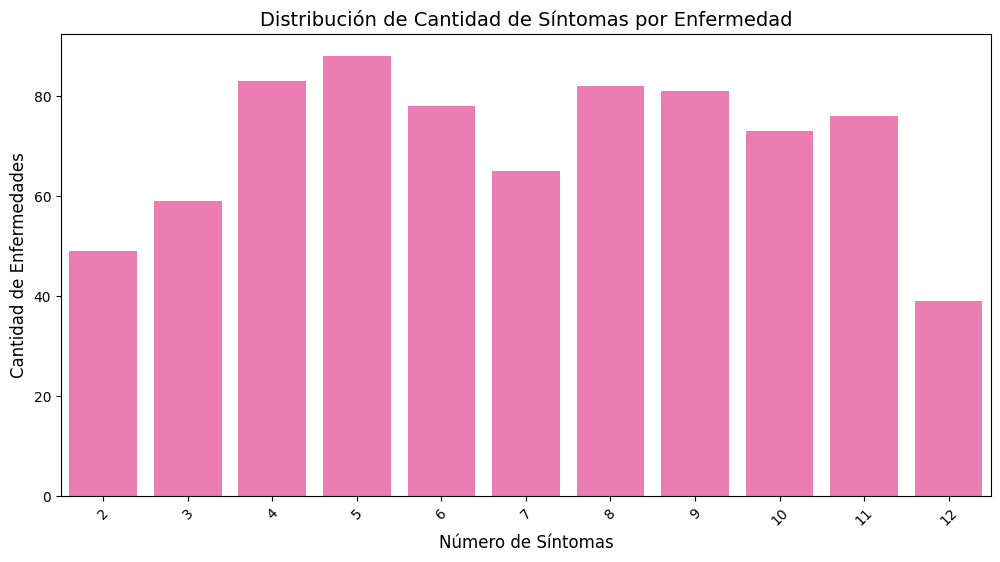

In [ ]:
sintomas_por_enfermedad = (resultado > 0).sum(axis=1)

distribucion_sintomas = sintomas_por_enfermedad.value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=distribucion_sintomas.index, y=distribucion_sintomas.values, color='hotpink')
plt.title('Distribución de Cantidad de Síntomas por Enfermedad', fontsize=14)
plt.xlabel('Número de Síntomas', fontsize=12)
plt.ylabel('Cantidad de Enfermedades', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Hay un gran rango en el número de síntomas para una enfermedad, lo que resulta para los casos de 2 síntomas un sesgo, ya que esto puede no representar en su totalidad a la enfermedad

#### Síntomas más frecuentes

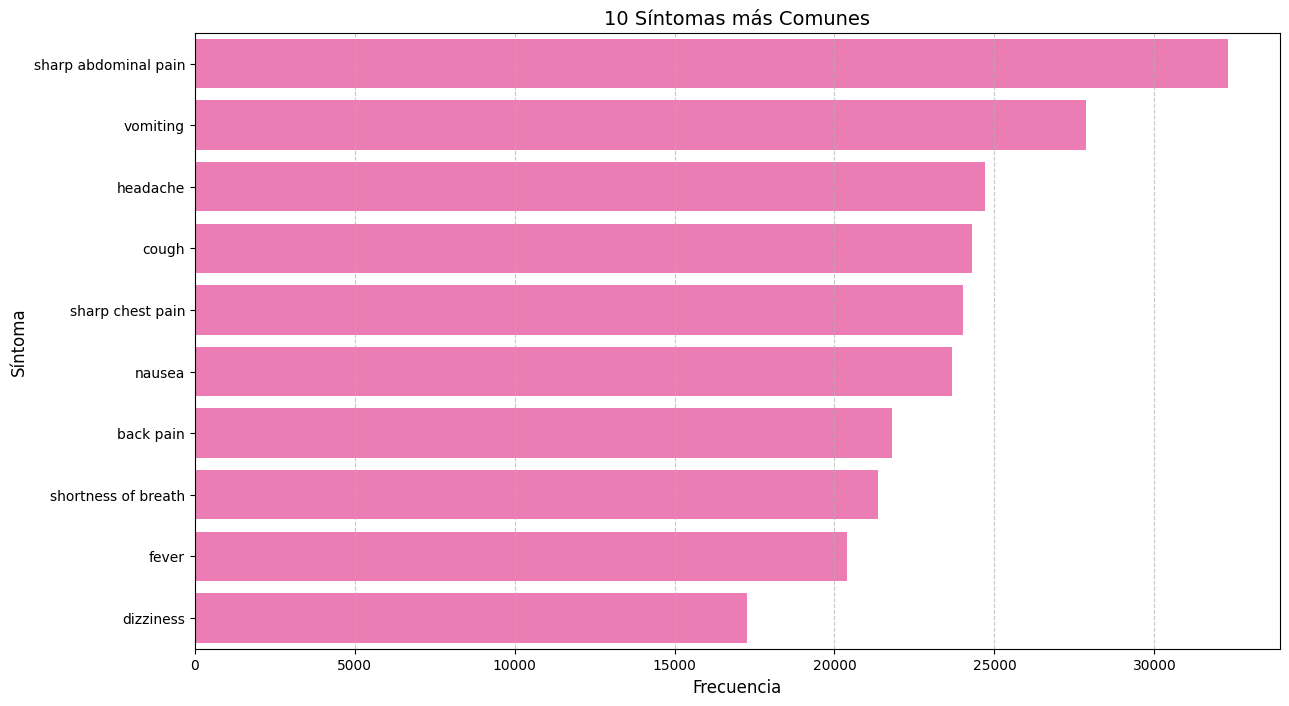

In [ ]:
top_sintomas = df.sum().nlargest(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_sintomas.values, y=top_sintomas.index, color="hotpink")
plt.title('10 Síntomas más Comunes', fontsize=14)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Síntoma', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
top_sintomas_frequencies = df.sum().loc[top_sintomas]
top_sintomas_frequencies.nlargest(10)

sharp abdominal pain    32307
vomiting                27874
headache                24719
cough                   24296
sharp chest pain        24016
nausea                  23687
back pain               21809
shortness of breath     21346
fever                   20394
dizziness               17272
dtype: int64

#### Matriz de correlación

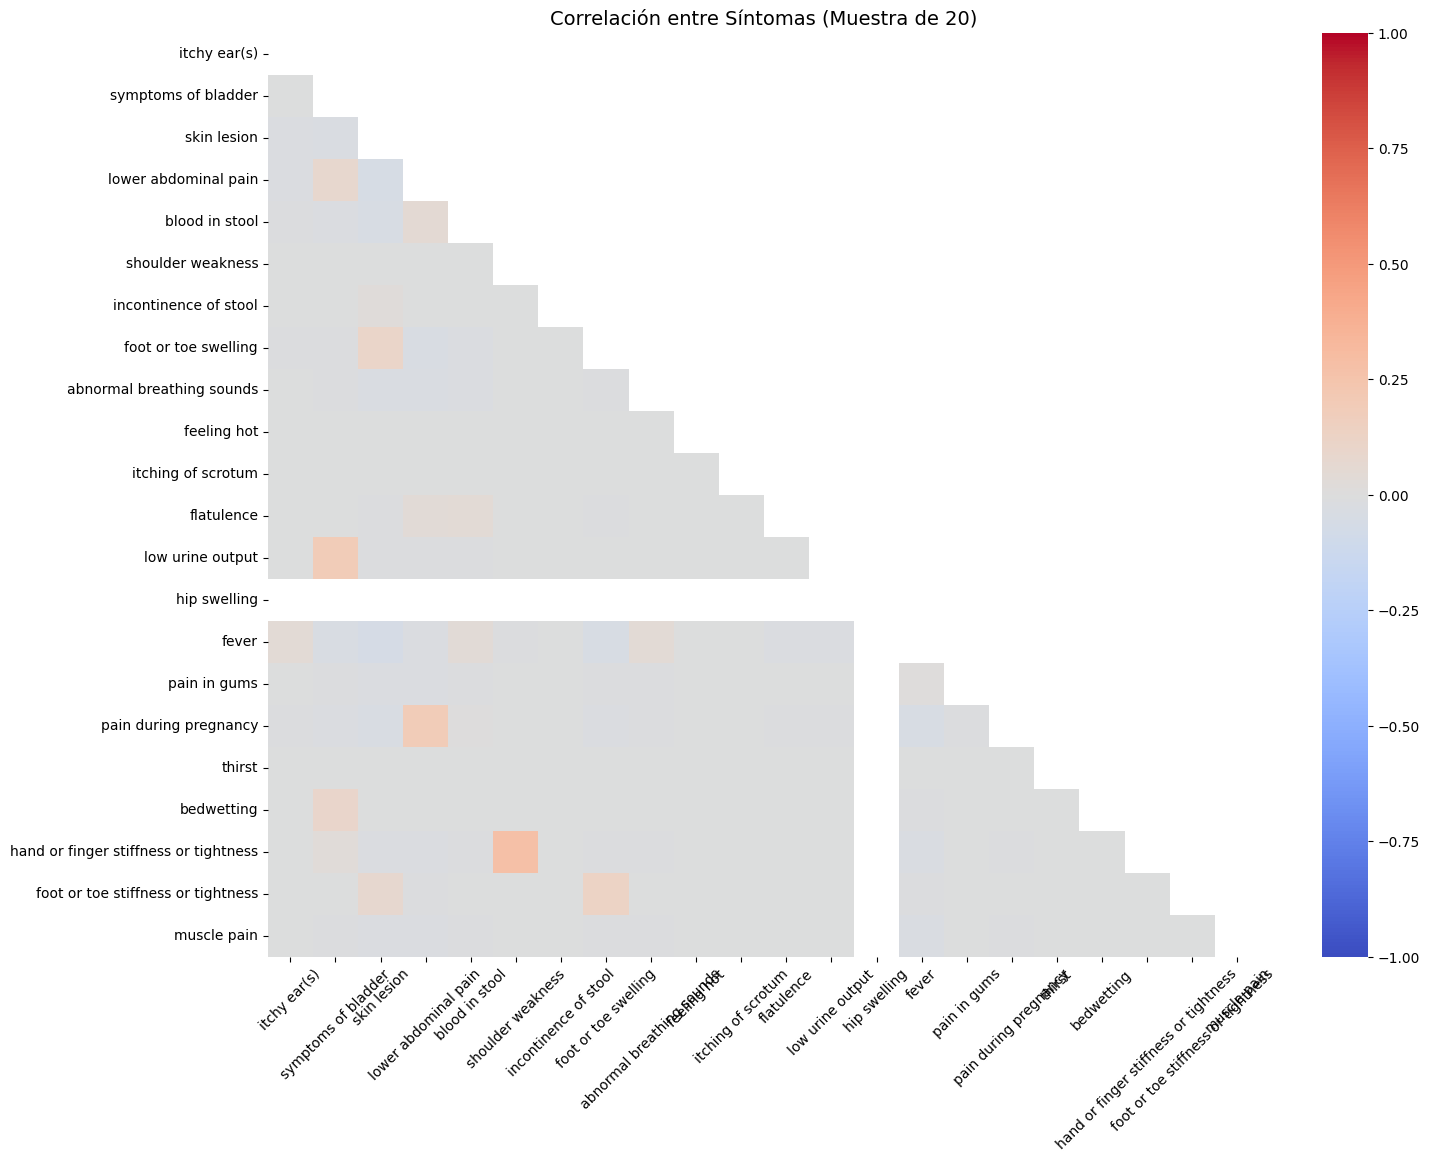

In [ ]:
sintomas_muestreo = df.sample(22, axis=1).columns

corr_matrix = df[sintomas_muestreo].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1, annot=False, mask=np.triu(np.ones_like(corr_matrix)))
plt.title('Correlación entre Síntomas (Muestra de 20)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Dependiendo de la selección de síntomas se va a observar una mayor correlación, usualmente en síntomas de la misma zona del cuerpo

#### Enfermedades con más registros

In [19]:
registros_por_enfermedad = df.index.value_counts()

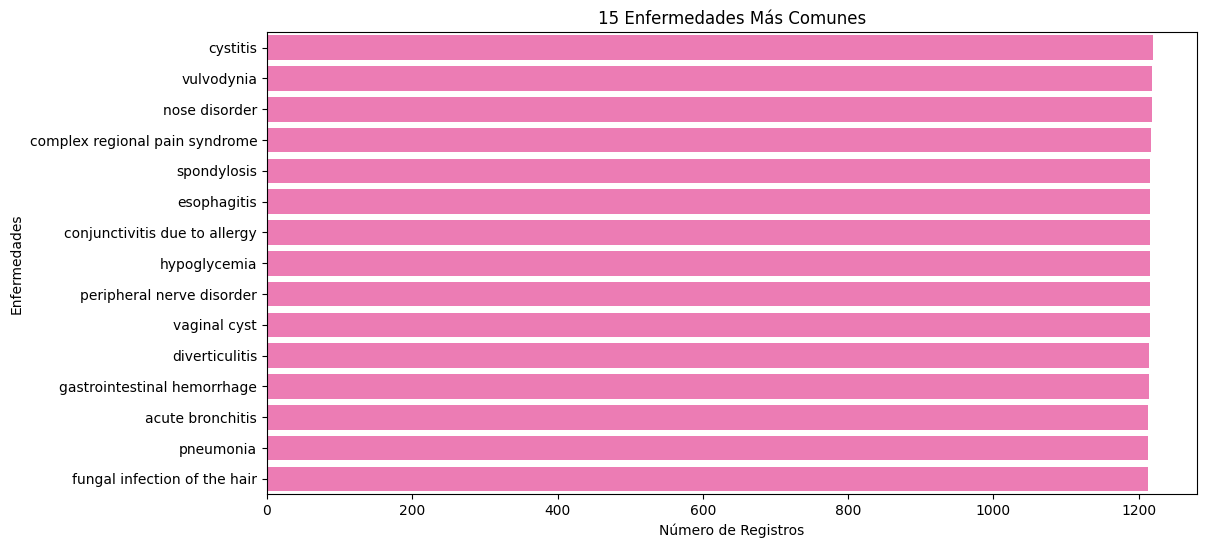

In [28]:
top_enfermedades = registros_por_enfermedad.nlargest(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_enfermedades.values, y=top_enfermedades.index, color='hotpink')
plt.title('15 Enfermedades Más Comunes')
plt.xlabel('Número de Registros')
plt.ylabel('Enfermedades')
plt.show()

In [24]:
registros_por_enfermedad.nlargest(10)

diseases
cystitis                          1219
vulvodynia                        1218
nose disorder                     1218
complex regional pain syndrome    1217
spondylosis                       1216
esophagitis                       1215
conjunctivitis due to allergy     1215
hypoglycemia                      1215
peripheral nerve disorder         1215
vaginal cyst                      1215
Name: count, dtype: int64

Síntomas de las enfermedades más comunes y con las que se han realizado pruebas para diagnósticos

In [ ]:
top_enfermedades = df.index.value_counts().nlargest(15).index

sintomas_top_enfermedades = {}
for enfermedad in top_enfermedades:
    # Filtrar las filas correspondientes a la enfermedad y sumar los valores de los síntomas
    sintomas_presentes = resultado.loc[enfermedad][resultado.loc[enfermedad] > 0].index.tolist()
    sintomas_top_enfermedades[enfermedad] = sintomas_presentes

for enfermedad, sintomas in sintomas_top_enfermedades.items():
    print(f"Enfermedad: {enfermedad}")
    print(f"Síntomas: {', '.join(sintomas)}")
    print("-" * 50)

Enfermedad: cystitis
Síntomas: retention of urine, suprapubic pain, sharp abdominal pain, painful urination, involuntary urination, frequent urination, lower abdominal pain, blood in urine, back pain, pelvic pain, side pain, symptoms of bladder
--------------------------------------------------
Enfermedad: vulvodynia
Síntomas: sharp abdominal pain, nausea, painful urination, lower abdominal pain, vaginal discharge, back pain, pain during pregnancy, pelvic pain, burning abdominal pain, vaginal pain, side pain, cramps and spasms
--------------------------------------------------
Enfermedad: nose disorder
Síntomas: sore throat, cough, nasal congestion, headache, facial pain, ear pain, fever, difficulty breathing, coryza, sinus congestion, painful sinuses, nosebleed
--------------------------------------------------
Enfermedad: complex regional pain syndrome
Síntomas: abnormal involuntary movements, leg pain, hand or finger pain, arm pain, back pain, neck pain, low back pain, foot or toe p

### 5. Análisis de Patrones

#### Correlación de síntomas principales

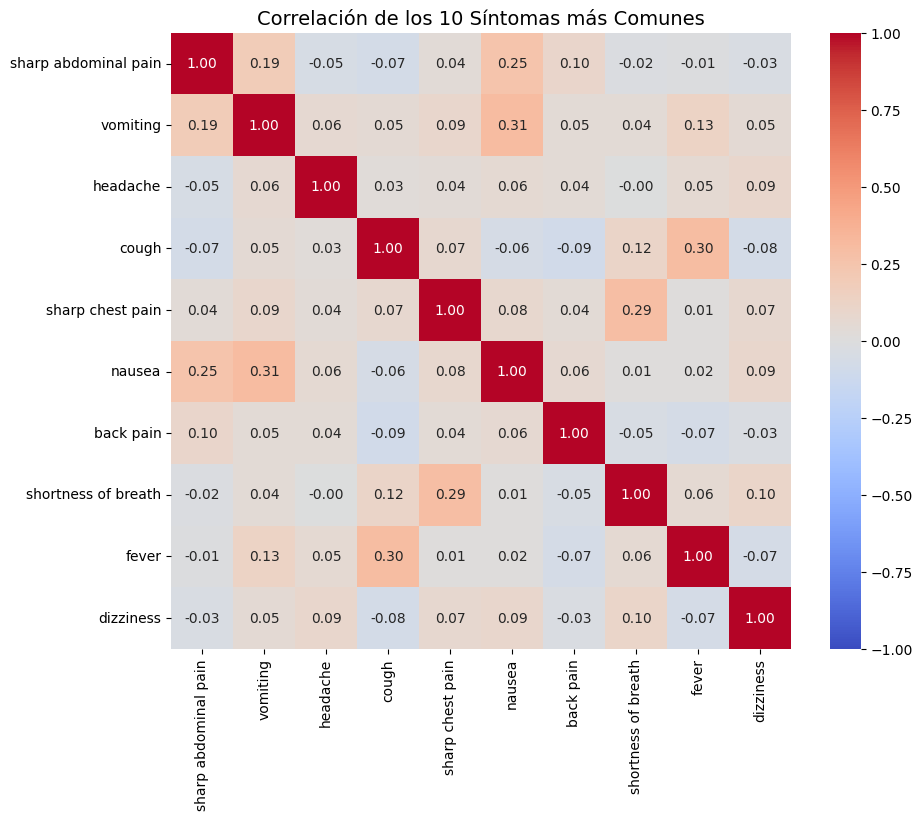

In [30]:
top_sintomas = df.sum().nlargest(10).index
co_ocurrencia = df[top_sintomas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(co_ocurrencia, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlación de los 10 Síntomas más Comunes', fontsize=14)
plt.show()

Se observa que los síntomas con mayor correlación son usualmente asociados a un resfriado o malestar estomacal